In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train[0].shape

(28, 28)

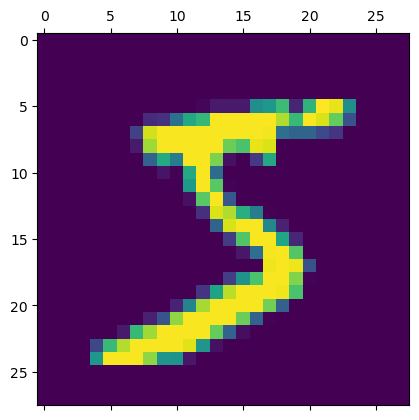

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

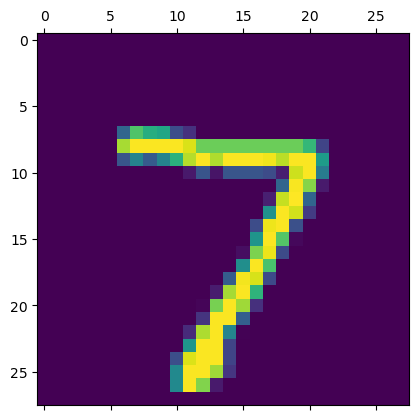

In [7]:
plt.matshow(x_test[0])

In [8]:
y_test[0]

7

In [9]:
28 * 28

784

In [10]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(700, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 1.1983 - accuracy: 0.8585
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2506 - accuracy: 0.9337
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1758 - accuracy: 0.9520
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1460 - accuracy: 0.9599
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1289 - accuracy: 0.9658
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9708
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1091 - accuracy: 0.9728
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906 - accuracy: 0.9768
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9796
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.08

In [22]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1459 - accuracy: 0.9713


[0.14589141309261322, 0.9713000059127808]

In [20]:
y_pred = ann.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


[1, 0, 0, 0, 4, 0, 4, 9, 6, 0]

In [21]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.99      0.30       980
           1       0.13      0.14      0.14      1135
           2       0.32      0.01      0.02      1032
           3       0.91      0.89      0.90      1010
           4       0.63      0.98      0.77       982
           5       0.33      0.01      0.03       892
           6       0.91      0.10      0.19       958
           7       0.97      0.31      0.46      1028
           8       0.62      0.15      0.24       974
           9       0.84      0.05      0.09      1009

    accuracy                           0.36     10000
   macro avg       0.59      0.36      0.31     10000
weighted avg       0.58      0.36      0.31     10000



In [25]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(700, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2868 - accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0615 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0418 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0234 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [27]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9916


[0.04314344376325607, 0.991599977016449]

In [31]:
y_pred2 = cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred2[:5]

array([[1.2121853e-15, 3.0832397e-04, 9.9991059e-01, 9.9980599e-01,
        9.9517125e-01, 3.7467991e-05, 1.5536117e-30, 1.0000000e+00,
        1.5004469e-03, 9.9269170e-01],
       [9.9164516e-01, 6.6170698e-01, 1.0000000e+00, 2.4023799e-03,
        2.7857504e-03, 8.2826170e-07, 9.9940979e-01, 9.9999881e-01,
        1.3114046e-05, 9.9985611e-01],
       [2.9720281e-08, 1.0000000e+00, 7.8552460e-12, 1.3575101e-12,
        1.0142195e-09, 2.8824905e-07, 1.2359859e-10, 7.3724592e-01,
        3.1969722e-02, 9.0111669e-09],
       [1.0000000e+00, 1.0399701e-04, 2.1103109e-04, 1.4805129e-07,
        2.5090216e-02, 6.2759268e-01, 9.9972862e-01, 1.7650621e-02,
        1.6670799e-01, 6.9686484e-01],
       [1.8904039e-03, 2.2146294e-03, 7.4067515e-01, 5.1034800e-19,
        1.0000000e+00, 8.4933299e-06, 9.9977738e-01, 6.0553288e-01,
        8.2244897e-01, 9.9926931e-01]], dtype=float32)

In [34]:
y_pred2 = [np.argmax(i) for i in y_pred2]
y_pred2[:5]

[7, 2, 1, 0, 4]

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
cm = tf.math.confusion_matrix(y_test, y_pred2)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1132,    1,    0,    1,    1,    0,    0,    0,    0],
       [   1,    2, 1021,    0,    1,    0,    0,    7,    0,    0],
       [   0,    0,   10,  992,    0,    4,    0,    1,    3,    0],
       [   0,    1,    0,    0,  980,    0,    0,    0,    0,    1],
       [   1,    0,    0,    3,    1,  886,    1,    0,    0,    0],
       [  15,    2,    1,    0,    4,    3,  931,    0,    2,    0],
       [   0,    1,    3,    0,    6,    0,    0, 1014,    1,    3],
       [   2,    0,    0,    0,    0,    4,    0,    1,  965,    2],
       [   0,    1,    0,    0,   16,    4,    0,    1,    1,  986]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

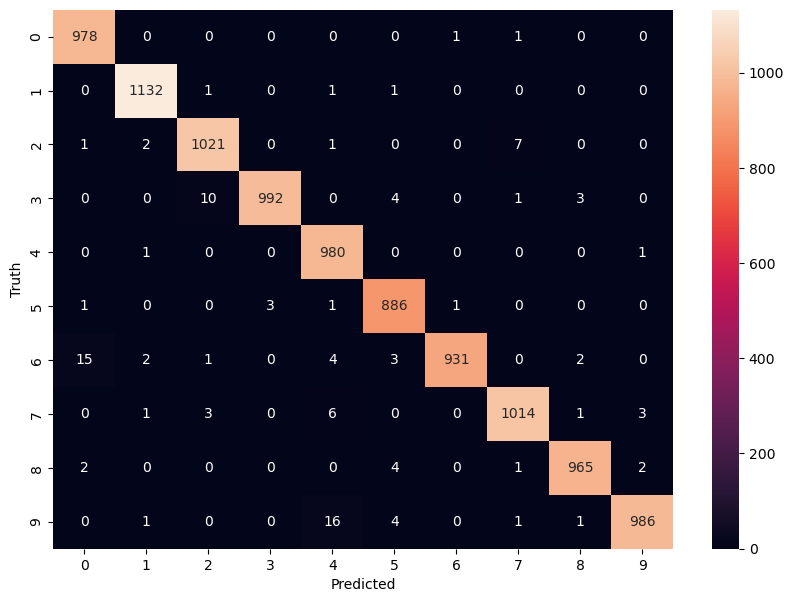

In [37]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')